# Dataset

In [1]:
import pandas as pd

The target is to predict the query execution time. For this attempt, will not be taken in account temporal order for each query.

In [2]:
# Global variables
RND_SEED = 42 # Control test

In [3]:
# Load the dataset generated during Analitycs 
dataset = pd.read_csv('queries_dataset.csv')

# Show sample
dataset.sample(10, random_state=RND_SEED)

,start_time,user_host,sql_text,query_time,use_customer,use_lineitem,use_nation,use_orders,use_part,use_partsupp,use_region,use_supplier,charlen,num_tokens,num_functions,num_select,num_from,num_where,num_join,num_order_by
15183,2021-01-14 15:00:29.394436,admin,select count(*) from information_schema.tables...,732.0,no,no,no,no,no,no,no,no,109,9,1,1,1,1,0,0
4469,2021-01-14 12:12:00.045871,admin,select 1,2597.0,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
9316,2021-01-14 13:27:59.398411,admin,select count(*) from information_schema.tables...,1560.0,no,no,no,no,no,no,no,no,109,9,1,1,1,1,0,0
4983,2021-01-14 12:17:18.085426,guest,"select\n\tp_brand,\n\tp_type,\n\tp_size,\n\tps...",277364.0,no,no,no,no,yes,yes,no,no,209,11,0,1,1,1,0,0
13154,2021-01-14 14:17:57.451075,guest,"select\n\ts_name,\n\tcount(*) as numwait\nfrom...",838041.0,no,yes,yes,yes,no,no,no,yes,619,20,1,3,3,3,0,1
10838,2021-01-14 13:47:29.397608,admin,select count(*) from information_schema.tables...,1706.0,no,no,no,no,no,no,no,no,109,9,1,1,1,1,0,0
3013,2021-01-14 11:56:44.402417,admin,select @@global.read_only,902.0,no,no,no,no,no,no,no,no,25,4,0,1,0,0,0,0
10957,2021-01-14 13:49:00.065132,admin,select 1,221.0,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
9767,2021-01-14 13:33:59.394591,admin,select 1,717.0,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
11469,2021-01-14 13:55:51.576280,guest,"select\n\ts_name,\n\tcount(*) as numwait\nfrom...",935194.0,no,yes,yes,yes,no,no,no,yes,620,20,1,3,3,3,0,1


In [4]:
# Dropping start_time, sql_text, and user_host
dataset.drop(['start_time', 'sql_text'], axis=1, inplace=True)

In [5]:
# Predictive features
X_df = dataset.drop('query_time', axis=1)

# Show sample
X_df.sample(10, random_state=RND_SEED)

,user_host,use_customer,use_lineitem,use_nation,use_orders,use_part,use_partsupp,use_region,use_supplier,charlen,num_tokens,num_functions,num_select,num_from,num_where,num_join,num_order_by
15183,admin,no,no,no,no,no,no,no,no,109,9,1,1,1,1,0,0
4469,admin,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
9316,admin,no,no,no,no,no,no,no,no,109,9,1,1,1,1,0,0
4983,guest,no,no,no,no,yes,yes,no,no,209,11,0,1,1,1,0,0
13154,guest,no,yes,yes,yes,no,no,no,yes,619,20,1,3,3,3,0,1
10838,admin,no,no,no,no,no,no,no,no,109,9,1,1,1,1,0,0
3013,admin,no,no,no,no,no,no,no,no,25,4,0,1,0,0,0,0
10957,admin,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
9767,admin,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
11469,guest,no,yes,yes,yes,no,no,no,yes,620,20,1,3,3,3,0,1


In [6]:
# Target variable
y_df = dataset['query_time']

# Show sample
y_df.sample(10, random_state=RND_SEED)

15183       732.0
4469       2597.0
9316       1560.0
4983     277364.0
13154    838041.0
10838      1706.0
3013        902.0
10957       221.0
9767        717.0
11469    935194.0
Name: query_time, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

# Split train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, random_state=RND_SEED) # Results are datasets and series

In [8]:
X_df

,user_host,use_customer,use_lineitem,use_nation,use_orders,use_part,use_partsupp,use_region,use_supplier,charlen,num_tokens,num_functions,num_select,num_from,num_where,num_join,num_order_by
0,guest,no,no,no,no,no,no,no,no,93,12,0,1,1,0,0,1
1,guest,no,no,no,no,no,no,no,no,13,3,0,0,0,0,0,0
2,guest,no,no,no,no,no,no,no,no,38,4,0,1,0,0,0,0
3,admin,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
4,admin,no,no,no,no,no,no,no,no,8,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15683,guest,no,no,no,no,no,no,no,no,68,6,0,0,0,0,0,0
15684,guest,no,no,no,no,no,no,no,no,57,4,1,1,0,0,0,0
15685,guest,no,no,no,no,no,no,no,no,13,3,0,0,0,0,0,0
15686,guest,no,no,no,no,no,no,no,no,13,3,0,0,0,0,0,0


### Preprocessor

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline


# A column transformer apply some transformation to column or columns then stack it togheter
preprocessor = ColumnTransformer([('ohenc', OneHotEncoder(sparse=False), slice(0,9)),
                                  ('norm', StandardScaler(), slice(9,18))], remainder='passthrough')

# The preprocessor is a sequence of steps that process raw data to suitable input for final model
#preprocessor = Pipeline(steps=[('columns', preprocessor), ('normalize', Normalizer(norm='l1'))])

# Show a sample of preprocessed data
pd.DataFrame(preprocessor.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.669212,-0.333700,-0.537961,-0.340535,0.053157,-0.754255,-0.140887,-0.517183
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.793368,-0.916910,-0.537961,-0.340535,-0.744603,-0.754255,-0.140887,-0.517183
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.299204,0.249510,-0.537961,-0.340535,0.053157,0.401438,-0.140887,-0.517183
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.793368,-0.916910,-0.537961,-0.340535,-0.744603,-0.754255,-0.140887,-0.517183
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.669212,-0.333700,-0.537961,-0.340535,0.053157,-0.754255,-0.140887,-0.517183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11761,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.793368,-0.916910,-0.537961,-0.340535,-0.744603,-0.754255,-0.140887,-0.517183
11762,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,-0.793368,-0.916910,-0.537961,-0.340535,-0.744603,-0.754255,-0.140887,-0.517183
11763,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.015170,1.707535,1.184627,1.108555,0.850917,1.557131,-0.140887,-0.517183
11764,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.195741,0.249510,-0.537961,-0.340535,0.053157,0.401438,-0.140887,-0.517183


# Models selection

In [10]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error
from sklearn.model_selection import cross_validate

cv_metrics = ['max_error', 'explained_variance', 'neg_mean_absolute_error']

### Random Forest

In [11]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Simple model with a random forest regressor
rforest_model = Pipeline(steps=[('pre', preprocessor), 
                                ('rforest', RandomForestRegressor(random_state=RND_SEED))], verbose=True)

# Wrap the model. This will internally scale the target variable in training
rforest_model = TransformedTargetRegressor(rforest_model, transformer=StandardScaler())


# Cross-validation
rforest_cv = cross_validate(rforest_model, X_train, y_train, cv=5, scoring=cv_metrics)

# Show results in a more readable way
pd.DataFrame(rforest_cv)

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing rforest, total=   0.8s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing rforest, total=   0.8s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing rforest, total=   0.8s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing rforest, total=   0.7s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing rforest, total=   0.7s


,fit_time,score_time,test_max_error,test_explained_variance,test_neg_mean_absolute_error
0,0.794514,0.032536,-1.081504e+07,0.956166,-47641.514932
1,0.792894,0.027924,-4.845487e+06,0.978650,-50975.637759
2,0.775555,0.029920,-1.599463e+06,0.984886,-46215.540043
3,0.753017,0.023905,-2.954811e+06,0.985422,-46214.060883
4,0.726058,0.024934,-2.060814e+06,0.984291,-48785.415566


In [12]:
print('Mean absolute error:', abs(round(rforest_cv['test_neg_mean_absolute_error'].mean(), 2)), 'microseconds.')

Mean absolute error: 47966.43 microseconds.


In [13]:
# Training. We can pass raw data
rforest_model.fit(X_train, y_train)

# Evaluation with test set
rforest_y_pred = rforest_model.predict(X_test)
y_true = y_test.values

# Show some metrics
print('\nExplained variance score:', explained_variance_score(y_true, rforest_y_pred))
print()
print('Mean absolute error:', mean_absolute_error(y_true, rforest_y_pred))
print()
print('Max error:', max_error(y_true, rforest_y_pred))

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing rforest, total=   0.9s

Explained variance score: 0.9829079994035206

Mean absolute error: 48007.84786173363

Max error: 3892831.2481785696


### Multi Layer Perceptron

In [14]:
# Bulit-in Multi Layer Perceptron
from sklearn.neural_network import MLPRegressor

# This model will use the available mlp regressor of sklearn with two hidden layers of 128 units
mlp_model = Pipeline(steps=[('pre', preprocessor), 
                            ('mlp', MLPRegressor(hidden_layer_sizes=(64,64,64),
                                                 random_state=RND_SEED))], verbose=True)

# Wrap the model. This will internally scale the target variable in training
mlp_model = TransformedTargetRegressor(mlp_model, transformer=StandardScaler())

# Cross-validation
mlp_cv = cross_validate(mlp_model, X_train, y_train, cv=5, scoring=cv_metrics)

# Show results in a more readable way
pd.DataFrame(mlp_cv)

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing mlp, total=   6.5s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing mlp, total=   5.4s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing mlp, total=   6.0s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing mlp, total=   4.9s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing mlp, total=   5.3s


,fit_time,score_time,test_max_error,test_explained_variance,test_neg_mean_absolute_error
0,6.552083,0.016951,-1.076677e+07,0.956677,-51972.083027
1,5.442114,0.016982,-4.604810e+06,0.975123,-71362.981295
2,6.030999,0.016955,-1.582253e+06,0.985366,-54732.148310
3,4.925052,0.019945,-3.117381e+06,0.985618,-51986.422223
4,5.387442,0.017952,-2.097382e+06,0.984767,-57775.300996


In [15]:
print('Mean absolute error:', abs(round(mlp_cv['test_neg_mean_absolute_error'].mean(), 2)), 'microseconds.')

Mean absolute error: 57565.79 microseconds.


In [16]:
# Training. We can pass raw data
mlp_model.fit(X_train, y_train)

# Evaluation
mlp_y_pred = mlp_model.predict(X_test)

# Show some metrics
print('\nExplained variance score:', explained_variance_score(y_true, mlp_y_pred))
print()
print('Mean absolute error:', mean_absolute_error(y_true, mlp_y_pred))
print()
print('Max error:', max_error(y_true, mlp_y_pred))

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing mlp, total=   4.9s

Explained variance score: 0.9846972523895433

Mean absolute error: 69555.72037804451

Max error: 3130378.085743871


### Keras Multi Layer Perceptron

In [17]:
# Keras Neural Network model (will use GPU if keras-gpu is installed)
import keras

# Model building function (see Keras functional API)
def kmodel_builder(n_features):
    
    input_layer = keras.Input(shape=(n_features,))
    
    x = keras.layers.Dense(128, activation='relu')(input_layer)
    x = keras.layers.Dropout(0.2)(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    x = keras.layers.Dense(64, activation='relu')(x)
    
    output_layer = keras.layers.Dense(1)(x)
    
    model = keras.Model(inputs=input_layer, outputs=output_layer)
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
    
    return model

# Test model builder and training behaviour
kmodel_X = preprocessor.transform(X_train) # Preprocess input data
kmodel_y = StandardScaler().fit_transform(y_train.values.reshape(-1,1)) # Preprocess target data
kmodel_demo = kmodel_builder(kmodel_X.shape[1]) # Build the model
kmodel_demo.summary() # Show a summary of model structure
train_history = kmodel_demo.fit(kmodel_X, kmodel_y, epochs=100, batch_size=32, validation_split=0.3)

Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 26)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               3456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 15,937
Trainable params: 15,937
Non-trainable params: 0
_______________________________________________________

8236/8236 [==============================] - 0s 42us/step - loss: 0.0239 - mae: 0.0517 - val_loss: 0.0262 - val_mae: 0.0719
Epoch 53/100
8236/8236 [==============================] - 0s 38us/step - loss: 0.0244 - mae: 0.0526 - val_loss: 0.0191 - val_mae: 0.0612
Epoch 54/100
8236/8236 [==============================] - 0s 39us/step - loss: 0.0255 - mae: 0.0531 - val_loss: 0.0220 - val_mae: 0.0632
Epoch 55/100
8236/8236 [==============================] - 0s 39us/step - loss: 0.0268 - mae: 0.0591 - val_loss: 0.0205 - val_mae: 0.0530
Epoch 56/100
8236/8236 [==============================] - 0s 39us/step - loss: 0.0276 - mae: 0.0611 - val_loss: 0.0183 - val_mae: 0.0589
Epoch 57/100
8236/8236 [==============================] - 0s 39us/step - loss: 0.0263 - mae: 0.0568 - val_loss: 0.0196 - val_mae: 0.0485
Epoch 58/100
8236/8236 [==============================] - 0s 39us/step - loss: 0.0245 - mae: 0.0529 - val_loss: 0.0175 - val_mae: 0.0548
Epoch 59/100
8236/8236 [==============================

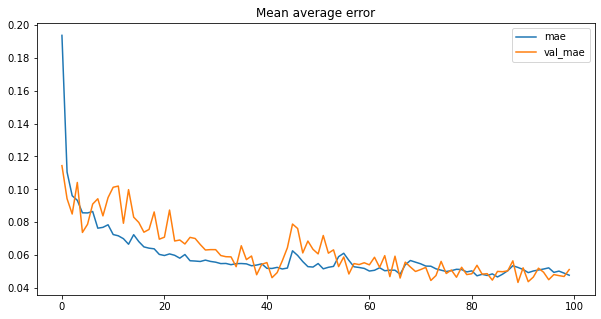

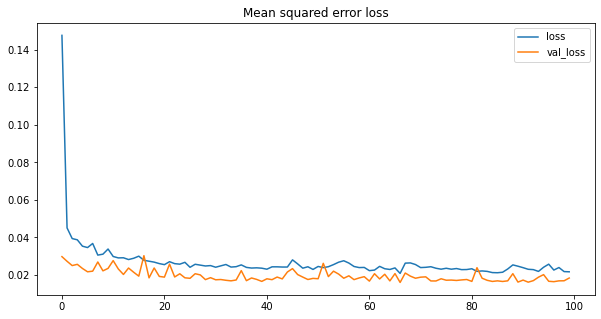

In [18]:
# Visualize the training process
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizza risultati addestramento
history_data = pd.DataFrame(train_history.history)

plt.figure(figsize=(10,5))

sns.lineplot(data=history_data[['mae', 'val_mae']], dashes=False)
plt.title('Mean average error')
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(data=history_data[['loss', 'val_loss']], dashes=False)
plt.title('Mean squared error loss')
plt.show()

In [19]:
# Integrating keras model in a Sklearn estimator
from keras.wrappers.scikit_learn import KerasRegressor

# Get number of features for neural network input size
n_features = kmodel_X.shape[1] 

# The keras model can be used as a sklearn estimator with all methods
keras_model = Pipeline(steps=[('pre', preprocessor), 
                              ('keras', KerasRegressor(kmodel_builder, 
                                                       n_features=n_features, 
                                                       batch_size=32,
                                                       epochs=50, 
                                                       verbose=0))], verbose=True)

# Wrap the model. This will internally scale the target variable during training
keras_model = TransformedTargetRegressor(keras_model, transformer=StandardScaler())

# Cross-validation
keras_cv = cross_validate(keras_model, X_train, y_train, cv=5, scoring=cv_metrics)

# Show results in a more readable way
pd.DataFrame(keras_cv)

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing keras, total=  15.2s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing keras, total=  15.3s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing keras, total=  15.0s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing keras, total=  15.2s
[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing keras, total=  15.6s


,fit_time,score_time,test_max_error,test_explained_variance,test_neg_mean_absolute_error
0,15.214790,0.062329,-1.075200e+07,0.953379,-69800.720829
1,15.334330,0.060511,-3.537306e+06,0.970820,-76409.535490
2,15.053415,0.060992,-1.449201e+06,0.983853,-54961.589037
3,15.220125,0.064924,-3.038108e+06,0.984031,-62526.904646
4,15.607789,0.060608,-2.074713e+06,0.981908,-61686.726293


In [20]:
print('Mean absolute error:', abs(round(keras_cv['test_neg_mean_absolute_error'].mean(), 2)), 'microseconds.')

Mean absolute error: 65077.1 microseconds.


In [21]:
# Training. We can pass raw data
keras_model.fit(X_train, y_train)

# Evaluation
keras_y_pred = keras_model.predict(X_test)

print('\nExplained variance score:', explained_variance_score(y_true, keras_y_pred))
print()
print('Mean absolute error:', mean_absolute_error(y_true, keras_y_pred))
print()
print('Max error score:', max_error(y_true, keras_y_pred))

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing keras, total=  19.3s

Explained variance score: 0.9793636557335954

Mean absolute error: 67848.2097291144

Max error score: 2190985.25


## Save model

In [22]:
from joblib import dump, load

In [23]:
# Train the choosen model on all available data
model = rforest_model.fit(X_df, y_df)

[Pipeline] ............... (step 1 of 2) Processing pre, total=   0.0s
[Pipeline] ........... (step 2 of 2) Processing rforest, total=   1.1s


In [24]:
# Save on disk the trained model
dump(model, 'query_time_predictor.model');

In [25]:
# Loading test
model = load('query_time_predictor.model')

# Evaluation (Yes, the model already seen this data... just for testing)
y_pred = model.predict(X_test)

print('\nExplained variance score:', explained_variance_score(y_true, y_pred))
print()
print('Mean absolute error:', mean_absolute_error(y_true, y_pred))
print()
print('Max error score:', max_error(y_true, y_pred))


Explained variance score: 0.9873187349090734

Mean absolute error: 44330.05610040534

Max error score: 2718575.673392857
